In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
# Convert MNIST image files to Tensor of 4D (# of images, height, width, color channels)
transform = transforms.ToTensor()

In [3]:
# Train data
train_data = datasets.MNIST(root='/cnn_data', train=True, download=True, transform=transform)

In [4]:
# Test data
test_data = datasets.MNIST(root='/cnn_data', train=False, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: /cnn_data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [6]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: /cnn_data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [7]:
# Small batch size for images
train_data_loader = DataLoader(train_data, batch_size=10, shuffle=True)
test_data_loader = DataLoader(test_data, batch_size=10, shuffle=False)

In [8]:
# Define our CNN model
# Describe convalutional layer and what it does (2 conv layers)
# This is an example of a simple CNN model
conv1 = nn.Conv2d(1, 6, 3, 1) # 1 input channel, 6 output channels, 3x3 kernel, stride 1
conv2 = nn.Conv2d(6, 16, 3, 1) # 6 input channel, 16 output channels, 3x3 kernel, stride 1

In [9]:
# Grab 1 MNIST record / image
for i, (X_train, y_train) in enumerate(train_data):
    break

In [10]:
X_train.shape

torch.Size([1, 28, 28])

In [11]:
x = X_train.view(1, 1, 28, 28) # 1 batch, 1 image, 28x28 image

In [12]:
# Perform our first convolution
x = F.relu(conv1(x)) # Apply ReLU activation function

In [13]:
x.shape

torch.Size([1, 6, 26, 26])

1 single image, 6 is the filters we asked for, 26x26 image shape

[1, 6, 26, 26]

In [14]:
x

tensor([[[[0.1716, 0.1716, 0.1716,  ..., 0.1716, 0.1716, 0.1716],
          [0.1716, 0.1716, 0.1716,  ..., 0.1716, 0.1716, 0.1716],
          [0.1716, 0.1716, 0.1716,  ..., 0.1716, 0.1716, 0.1716],
          ...,
          [0.1716, 0.1716, 0.1698,  ..., 0.1716, 0.1716, 0.1716],
          [0.1716, 0.1716, 0.2564,  ..., 0.1716, 0.1716, 0.1716],
          [0.1716, 0.1716, 0.1716,  ..., 0.1716, 0.1716, 0.1716]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0

In [15]:
#Pass through max pooling layer
x = F.max_pool2d(x, 2, 2) # 2x2 kernel, stride 2

In [16]:
x.shape # 26/2 = 13

torch.Size([1, 6, 13, 13])

In [17]:
# Perform our second convolution
x = F.relu(conv2(x)) # Apply ReLU activation function

In [18]:
x.shape # Again we did not use padding so we lose 2 pixels on each dimension

torch.Size([1, 16, 11, 11])

In [19]:
#Pass through max pooling layer again
x = F.max_pool2d(x, 2, 2) # 2x2 kernel, stride 2

In [20]:
x.shape # 11/2 = 5

torch.Size([1, 16, 5, 5])

In [21]:
((28-2) / 2-2) / 2

5.5

## Starting of L-16 (Actual CNN Model)

In [22]:
#Model class
class ConvoluationalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1) # 1 input channel, 6 output channels, 3x3 kernel, stride 1
        self.conv2 = nn.Conv2d(6, 16, 3, 1) # 6 input channel, 16 output channels, 3x3 kernel, stride 1
        self.fc1 = nn.Linear(5*5*16, 120) # Fully connected layer
        self.fc2 = nn.Linear(120, 84) # Fully connected layer
        self.fc3 = nn.Linear(84, 10) # Fully connected layer
        
    def forward(self, X):
        X = F.relu(self.conv1(X)) # Apply ReLU activation function
        X = F.max_pool2d(X, 2, 2) # 2x2 kernel, stride 2
        #Second pass
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)

        # Review to flatten the tensor
        X = X.view(-1, 5*5*16) # -1 is a placeholder for the batch size

        # Fully connected layers
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        
        return F.log_softmax(X, dim=1)

In [23]:
# Instantiate the model
torch.manual_seed(42)
model = ConvoluationalNetwork()
model

ConvoluationalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
# Loss function Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [31]:
import time 
start_time = time.time()

# Create Variables to track of things
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

# Epochs
for i in range(epochs):
    trn_corr = 0
    tst_corr = 0

    # Train
    for b, (X_train, y_train) in enumerate(train_data_loader):
        b+=1 # start our batches at 1
        y_pred = model(X_train) # Not flattened. It's 2D
        loss = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data, 1)[1] # add up the correct predictions. 1 is the index location of the max value
        batch_corr = (predicted == y_train).sum() # sum up the correct predictions in the batch (True = 1, False = 0)
        trn_corr += batch_corr

        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print out some results
        if b%600 == 0:
            print(f'Epoch: {i} Batch: {b} LOSS: {loss.item()} ACCURACY: {trn_corr.item()*100/(10*b)}%')

    train_losses.append(loss)
    train_correct.append(trn_corr)

    # Test
    with torch.no_grad(): # No gradient. So we don't update the weights & biases during testing
        for b, (X_test, y_test) in enumerate(test_data_loader):
            y_val = model(X_test)
            predicted = torch.max(y_val.data, 1)[1]
            tst_corr += (predicted == y_test).sum()

    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
    
current_time = time.time()
total_time = current_time - start_time
print(f"Training took: {total_time} seconds!")

Epoch: 0 Batch: 600 LOSS: 0.00013905954256188124 ACCURACY: 99.2%
Epoch: 0 Batch: 1200 LOSS: 0.04811400920152664 ACCURACY: 99.16666666666667%
Epoch: 0 Batch: 1800 LOSS: 0.32095691561698914 ACCURACY: 99.2%
Epoch: 0 Batch: 2400 LOSS: 0.00010684460721677169 ACCURACY: 99.225%
Epoch: 0 Batch: 3000 LOSS: 6.833321822341532e-05 ACCURACY: 99.23%
Epoch: 0 Batch: 3600 LOSS: 3.072997060371563e-05 ACCURACY: 99.23611111111111%
Epoch: 0 Batch: 4200 LOSS: 1.6402671462856233e-05 ACCURACY: 99.24047619047619%
Epoch: 0 Batch: 4800 LOSS: 0.00015648467524442822 ACCURACY: 99.23541666666667%
Epoch: 0 Batch: 5400 LOSS: 0.0009989041136577725 ACCURACY: 99.23518518518519%
Epoch: 0 Batch: 6000 LOSS: 1.3315456271811854e-05 ACCURACY: 99.225%
Epoch: 1 Batch: 600 LOSS: 0.0002777271729428321 ACCURACY: 99.38333333333334%
Epoch: 1 Batch: 1200 LOSS: 0.0012573690619319677 ACCURACY: 99.34166666666667%
Epoch: 1 Batch: 1800 LOSS: 0.00510744471102953 ACCURACY: 99.36111111111111%
Epoch: 1 Batch: 2400 LOSS: 5.549782144953497e-05 

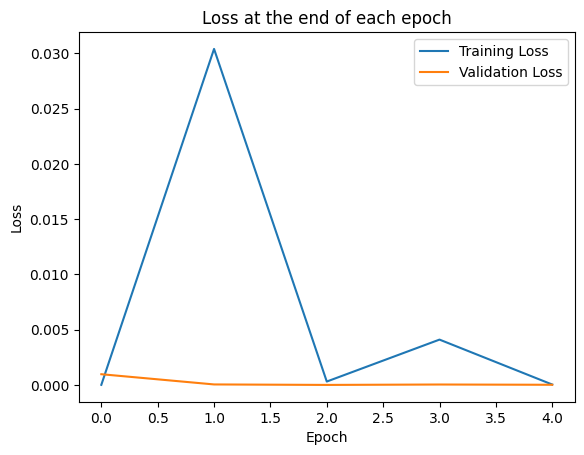

In [32]:
# Graph the loss at each epoch
train_losses = [trl.item() for trl in train_losses]
# test_losses = [tel.item() for tel in test_losses]
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Validation Loss')
plt.title('Loss at the end of each epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

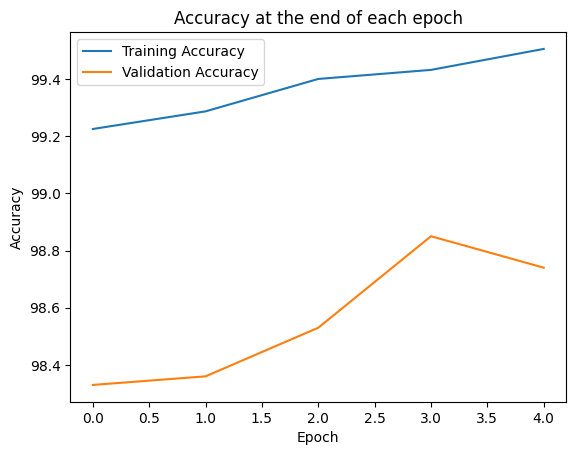

In [33]:
# Graph the accuracy at each epoch
train_correct = [trc/600 for trc in train_correct] 
test_correct = [tec/100 for tec in test_correct]
plt.plot(train_correct, label='Training Accuracy')
plt.plot(test_correct, label='Validation Accuracy')
plt.title('Accuracy at the end of each epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [34]:
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [35]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test)
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()

In [36]:
# Did for correct predictions
correct.item() / len(test_data) * 100 # accuracy(%)

98.74000000000001

In [ ]:
# Grab an image from the test dataset
test_data[4143] # 9

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
test_data[4146] # 0

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# Grab just the data
x = test_data[4143][0]
x

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [42]:
x = x.reshape(28, 28)
x

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

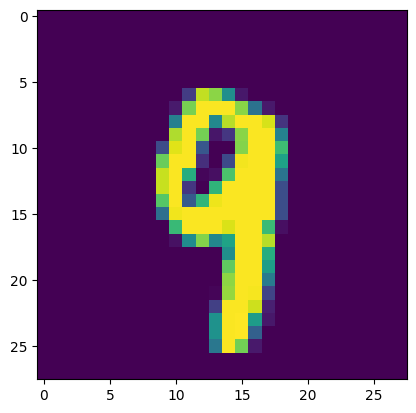

In [43]:
# Show the image
plt.imshow(x)

In [47]:
# Pass the image through the model
model.eval()
with torch.no_grad():
    new_pred = model(x.view(1, 1, 28, 28)) # 1 batch, 1 color channel, 28x28 image

In [51]:
# Check the new prediction
new_pred

tensor([[-1.7290e+01, -2.3077e+01, -1.8238e+01, -1.7843e+01, -9.4622e+00,
         -1.7235e+01, -2.5757e+01, -1.3151e+01, -1.5679e+01, -7.9867e-05]])

In [54]:
new_pred.argmax()

tensor(9)

In [53]:
new_pred.argmax().item()

9